## 1. Importing Modules, Libraries and Dependencies

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler , StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas
from sklearn.base import RegressorMixin
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import Parallel, delayed
import optuna

## 2. Loading the Dataset

In [2]:
train_df = pd.read_csv('..\\dataset\\train.csv')
test_df = pd.read_csv('..\\dataset\\test.csv')
submission_df = pd.read_csv('..\\dataset\\sample_submission.csv')

In [3]:
train_df = train_df.dropna()

In [4]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [5]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52893 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            52893 non-null  int64 
 1   brand         52893 non-null  object
 2   model         52893 non-null  object
 3   model_year    52893 non-null  int64 
 4   milage        52893 non-null  int64 
 5   fuel_type     52893 non-null  object
 6   engine        52893 non-null  object
 7   transmission  52893 non-null  object
 8   ext_col       52893 non-null  object
 9   int_col       52893 non-null  object
 10  accident      52893 non-null  object
 11  clean_title   52893 non-null  object
 12  price         52893 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.6+ MB


## 3. Feature Engineering

### 3.1 Extracting `Horse Power` from the `engine` column.

In [ ]:
def get_horse_power(x : pandas.Series,
                    df: pandas.DataFrame)->pandas.DataFrame:
    """
    Extracts the horsepower values from a pandas Series and adds them to a DataFrame.

    Parameters:
    x (pandas.Series): A pandas Series containing strings, some of which include horsepower values 
                       (formatted as 'XXXHP').
    df (pandas.DataFrame): A pandas DataFrame to which the horsepower values will be added.

    Returns:
    pandas.DataFrame: The original DataFrame with an additional column 'horse power' containing the 
                      extracted horsepower values as floats. If a string in the Series does not 
                      contain a horsepower value, NaN is inserted.
    Example:
    >>> import pandas as pd
    >>> data = {'description': ['200HP engine', 'No HP value', '150HP motor']}
    >>> df = pd.DataFrame(data)
    >>> get_horse_power(df['description'], df)
       description       horse power
    0  200HP engine       200.0
    1  No HP value        NaN
    2  150HP motor        150.0
    """
    x.to_list()
    hp = []
    for i in x:
        if  i.split()[0].endswith('HP'):
            hp.append(float(i.split()[0].strip('HP')))
        else:
            hp.append(np.nan)
    df['horse power'] = hp
    return df

In [8]:
train_df = get_horse_power(train_df['engine'] , train_df)
test_df = get_horse_power(test_df['engine'] , test_df)

In [9]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse power
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000,445.0
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500,220.0
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950,420.0
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965,NaN


In [10]:
train_df.isna().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
horse power     3603
dtype: int64

### 3.2 Extracting `Capacity` from the `engine` column.

In [11]:
def get_capacity(x : pandas.Series,
                 df: pandas.DataFrame) -> pandas.DataFrame:
    """
    Extracts the capacity values from a pandas Series and adds them to a DataFrame.

    Parameters:
    x (pandas.Series): A pandas Series containing strings, some of which include capacity values 
                       (formatted as 'XXXL').
    df (pandas.DataFrame): A pandas DataFrame to which the capacity values will be added.

    Returns:
    pandas.DataFrame: The original DataFrame with an additional column 'capacity' containing the 
                      extracted capacity values as floats. If a string in the Series does not 
                      contain a capacity value, NaN is inserted.

    Example:
    >>> import pandas as pd
    >>> data = {'description': ['200HP 2.0L engine', 'No capacity value', '150HP 3.5L motor']}
    >>> df = pd.DataFrame(data)
    >>> get_capacity(df['description'], df)
               description  capacity
    0  200HP 2.0L engine       2.0
    1  No capacity value       NaN
    2  150HP 3.5L motor        3.5
    """
    x.to_list()
    capacity = []
    x_new  = [i.split() for i in x]
    for i in x_new:
        if len(i) >=2:
            if i[1].endswith('L'):
                capacity.append(float(i[1].strip('L')))
            else:
                capacity.append(np.nan)
        else:
            capacity.append(np.nan)
    df['capacity'] = capacity
    return df

In [12]:
train_df = get_capacity(train_df['engine'] , train_df)
test_df = get_capacity(test_df['engine'] , test_df)

In [13]:
train_df.isna().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
horse power     3603
capacity        3758
dtype: int64

### 3.3 Selecting important and necessary `features` and corresponding `targets`

In [17]:
input_cols = ['brand' , 'model_year' , 'milage' , 'fuel_type' , 'horse power', 'capacity' , 'transmission']
target_col = 'price'

In [18]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()

In [19]:
train_inputs

,brand,model_year,milage,fuel_type,horse power,capacity,transmission
0,Ford,2018,74349,Gasoline,375.0,3.5,10-Speed A/T
1,BMW,2007,80000,Gasoline,300.0,3.0,6-Speed M/T
2,Jaguar,2009,91491,Gasoline,300.0,4.2,6-Speed A/T
3,BMW,2022,2437,Hybrid,335.0,3.0,Transmission w/Dual Shift Mode
4,Pontiac,2001,111000,Gasoline,200.0,3.8,A/T
...,...,...,...,...,...,...,...
54268,BMW,2017,29000,Gasoline,445.0,4.4,8-Speed A/T
54269,Audi,2015,94634,E85 Flex Fuel,220.0,2.0,6-Speed A/T
54270,Porsche,2013,40989,Gasoline,420.0,3.6,Transmission w/Dual Shift Mode
54271,Porsche,2023,1518,Gasoline,NaN,NaN,8-Speed Automatic with Auto-Shift


In [20]:
numeric_cols = ['model_year' , 'milage' , 'horse power' , 'capacity' ]
categorical_cols = [ 'brand' ,'fuel_type', 'transmission' ]

In [21]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

capacity       3758
horse power    3603
model_year        0
milage            0
dtype: int64

In [22]:
def rmse(targets , predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

## 4. Data Preprocessing

### 4.1 Imputing the `missing values`

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean' , missing_values=np.nan)

In [24]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [25]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]= imputer.transform(test_inputs[numeric_cols])

In [26]:
test_inputs.isna().sum()

brand           0
model_year      0
milage          0
fuel_type       0
horse power     0
capacity        0
transmission    0
dtype: int64

In [27]:
train_inputs.isna().sum()

brand           0
model_year      0
milage          0
fuel_type       0
horse power     0
capacity        0
transmission    0
dtype: int64

### 4.2 Encoding `Categorical Columns`

In [28]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

c:\SAKET\Coding\PYTHON\Python Projects\Machine Learning Projects\KaggleX Skill Assesment Challenge\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Saket\AppData\Local\Temp\ipykernel_21584\480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Saket\AppData\Local\Temp\ipykernel_21584\480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Saket\AppData\Local\Temp\ipykernel_21584\480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [30]:
train_inputs

,brand,model_year,milage,fuel_type,horse power,capacity,transmission,brand_Acura,brand_Alfa,brand_Aston,...,transmission_Automatic,transmission_Automatic CVT,transmission_CVT Transmission,transmission_CVT-F,transmission_F,transmission_M/T,transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable
0,Ford,2018.0,74349.0,Gasoline,375.000000,3.500000,10-Speed A/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BMW,2007.0,80000.0,Gasoline,300.000000,3.000000,6-Speed M/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jaguar,2009.0,91491.0,Gasoline,300.000000,4.200000,6-Speed A/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BMW,2022.0,2437.0,Hybrid,335.000000,3.000000,Transmission w/Dual Shift Mode,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Pontiac,2001.0,111000.0,Gasoline,200.000000,3.800000,A/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,2017.0,29000.0,Gasoline,445.000000,4.400000,8-Speed A/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54269,Audi,2015.0,94634.0,E85 Flex Fuel,220.000000,2.000000,6-Speed A/T,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54270,Porsche,2013.0,40989.0,Gasoline,420.000000,3.600000,Transmission w/Dual Shift Mode,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54271,Porsche,2023.0,1518.0,Gasoline,332.566322,3.731221,8-Speed Automatic with Auto-Shift,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

### 4.3 Spliting the training dataset using `train_test_split` into validation dataset.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X_train, train_targets, test_size=0.2  ,random_state=42)

In [33]:
X_train.shape , X_test.shape , X_val.shape , val_targets.shape , X_test.shape

((42314, 108), (36183, 108), (10579, 108), (10579,), (36183, 108))

## 5. Experimenting with Different `Machine Learning Alogorithms`

In [ ]:
from sklearn.base import RegressorMixin

In [49]:
models: dict[RegressorMixin,dict[str,float]] = {
    
    LinearRegression : {
        'n_jobs' : -1
    },

    SGDRegressor : {
        'eta0' : 0.001 ,
        'max_iter': 2000 ,
        'penalty': 'l1' ,
        'learning_rate': 'adaptive'
    },

    DecisionTreeRegressor : {
        'max_depth': 32 , 
        'max_features': 'sqrt' , 
        'max_leaf_nodes': 100 , 
        'min_samples_leaf': 4
    },

    RandomForestRegressor : {
                'n_estimators': 400 ,
                'max_depth': 32 , 
                'min_samples_split': 10 ,
                'min_samples_leaf':4 , 
                'n_jobs':-1
    },

    GradientBoostingRegressor:{
        'learning_rate': 0.06,
        'n_estimators' : 900,
    },

    XGBRegressor : {
        'n_estimators': 400,
        'max_depth': 10,
        'learning_rate': 0.01,
        'subsample': 0.5,

    },

    LGBMRegressor : {
        'n_estimators': 500,
        'num_leaves': 32 , 
        'learning_rate': 0.01,
        'subsample': 0.7,
    },

    MLPRegressor : {
        'activation': 'identity',
        'solver': 'adam',
        'batch_size': 32,
        'max_iter': 400,
        'random_state': 42,
        'beta_1': 0.5,

    },
    
    CatBoostRegressor : {
        'n_estimators': 500,
        "od_type": 'Iter',  
        "bootstrap_type": 'Bernoulli',
    },

}

In [50]:
def evaluate_model(model : type[RegressorMixin],
                   params : dict,
                   X_train : np.ndarray,
                   train_targets : np.ndarray,
                   X_val: np.ndarray, 
                   val_targets :np.ndarray) -> tuple[float,float,float,float,float,float]:
    
    """
    Evaluates a regression model on training and validation datasets.

    Parameters:
    model (type[RegressorMixin]): The regression model class.
    params (dict): The parameters to initialize the regression model.
    X_train (np.ndarray): The training feature data.
    train_targets (np.ndarray): The training target data.
    X_val (np.ndarray): The validation feature data.
    val_targets (np.ndarray): The validation target data.

    Returns:
    tuple: A tuple containing:
        - train_mae (float): Mean Absolute Error on the training data.
        - val_mae (float): Mean Absolute Error on the validation data.
        - train_rmse (float): Root Mean Squared Error on the training data.
        - val_rmse (float): Root Mean Squared Error on the validation data.
        - train_r2 (float): R-squared score on the training data.
        - val_r2 (float): R-squared score on the validation data.

    Example:
    >>> from sklearn.linear_model import Ridge
    >>> import numpy as np
    >>> X_train = np.array([[1, 2], [3, 4], [5, 6]])
    >>> train_targets = np.array([1, 2, 3])
    >>> X_val = np.array([[7, 8], [9, 10]])
    >>> val_targets = np.array([4, 5])
    >>> params = {'alpha': 1.0}
    >>> evaluate_model(Ridge, params, X_train, train_targets, X_val, val_targets)
    (0.0, 1.0, 0.0, 1.0, 1.0, 0.0)
    """
    regressor = model(**params).fit(X_train, train_targets)
    train_preds = regressor.predict(X_train)
    val_preds = regressor.predict(X_val)

    train_mae = mean_absolute_error(train_targets, train_preds)
    val_mae = mean_absolute_error(val_targets, val_preds)

    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

    train_r2 = r2_score(train_targets, train_preds)
    val_r2 = r2_score(val_targets, val_preds)

    return (train_mae, val_mae, train_rmse, val_rmse, train_r2, val_r2)

def try_models(model_dict: dict[RegressorMixin,dict[str,float]], 
               X_train: np.array, 
               train_targets: np.array, 
               X_val: np.array, 
               val_targets: np.array) -> pd.DataFrame:
    """
    Evaluates multiple regression models and returns a DataFrame with their performance metrics.

    Parameters:
    model_dict (dict): A dictionary where keys are regression model classes and values are 
                       dictionaries of parameters for initializing the models.
    X_train (np.ndarray): The training feature data.
    train_targets (np.ndarray): The training target data.
    X_val (np.ndarray): The validation feature data.
    val_targets (np.ndarray): The validation target data.

    Returns:
    pd.DataFrame: A DataFrame containing the model names, parameters, and performance metrics 
                  (MAE, RMSE, R-squared) for both training and validation datasets.

    Example:
    >>> from sklearn.linear_model import Ridge, Lasso
    >>> import numpy as np
    >>> import pandas as pd
    >>> X_train = np.array([[1, 2], [3, 4], [5, 6]])
    >>> train_targets = np.array([1, 2, 3])
    >>> X_val = np.array([[7, 8], [9, 10]])
    >>> val_targets = np.array([4, 5])
    >>> model_dict = {
    >>>     Ridge: {'alpha': 1.0},
    >>>     Lasso: {'alpha': 0.1}
    >>> }
    >>> try_models(model_dict, X_train, train_targets, X_val, val_targets)
          models               params  train_mae  val_mae  train_rmse  val_rmse  train_r2  val_r2
    0     Ridge   {'alpha': 1.0}        0.0       1.0       0.0        1.0       1.0       0.0
    1     Lasso   {'alpha': 0.1}        0.1       0.9       0.1        0.9       0.99      0.01
    """
    
    results = Parallel(n_jobs=-1)(delayed(evaluate_model)(model, params, X_train, train_targets, X_val, val_targets) for model, params in model_dict.items())

    metrics = ['train_mae', 'val_mae', 'train_rmse', 'val_rmse', 'train_r2', 'val_r2']
    results_dict = {metric: [result[i] for result in results] for i, metric in enumerate(metrics)}

    df = pd.DataFrame({
        'models': list(model_dict.keys()),
        'params': list(model_dict.values()),
        **results_dict
    })

    return df

In [51]:
model_scores_df = try_models(model_dict=models,X_train=X_train,X_val=X_val,train_targets=train_targets,val_targets=val_targets)
model_scores_df

,models,params,train_mae,val_mae,train_rmse,val_rmse,train_r2,val_r2
0,<class 'sklearn.linear_model._base.LinearRegre...,{'n_jobs': -1},1.851260e+04,1.899779e+04,6.700926e+04,7.730836e+04,1.139948e-01,7.645254e-02
1,<class 'sklearn.linear_model._stochastic_gradi...,"{'eta0': 0.001, 'max_iter': 2000, 'penalty': '...",7.478938e+14,7.457763e+14,9.077814e+14,9.032228e+14,-1.626032e+20,-1.260655e+20
2,<class 'sklearn.tree._classes.DecisionTreeRegr...,"{'max_depth': 32, 'max_features': 'sqrt', 'max...",1.937909e+04,2.009097e+04,6.638706e+04,7.789259e+04,1.303719e-01,6.244114e-02
3,<class 'sklearn.ensemble._forest.RandomForestR...,"{'n_estimators': 400, 'max_depth': 32, 'min_sa...",1.368604e+04,1.798097e+04,5.745542e+04,7.794156e+04,3.486286e-01,6.126187e-02
4,<class 'sklearn.ensemble._gb.GradientBoostingR...,"{'learning_rate': 0.001, 'n_estimators': 400}",2.183683e+04,2.227437e+04,6.897032e+04,7.854943e+04,6.137717e-02,4.656216e-02
5,<class 'xgboost.sklearn.XGBRegressor'>,"{'n_estimators': 400, 'max_depth': 10, 'learni...",1.455067e+04,1.757152e+04,4.505957e+04,7.768107e+04,5.993726e-01,6.752615e-02
6,<class 'lightgbm.sklearn.LGBMRegressor'>,"{'n_estimators': 500, 'num_leaves': 32, 'learn...",1.646884e+04,1.754689e+04,6.192566e+04,7.643414e+04,2.433277e-01,9.722195e-02
7,<class 'sklearn.neural_network._multilayer_per...,"{'activation': 'identity', 'solver': 'adam', '...",1.940673e+04,1.981562e+04,6.797016e+04,7.787254e+04,8.840232e-02,6.292366e-02
8,<class 'catboost.core.CatBoostRegressor'>,"{'n_estimators': 500, 'od_type': 'Iter', 'boot...",1.564962e+04,1.755627e+04,5.145405e+04,7.747468e+04,4.775970e-01,7.247444e-02


## 6. Training a Baseline `CatBoostRegressor` Model.

In [57]:
best_cbr_params  = model_scores_df.loc[8]["params"]
best_cbr_params

{'n_estimators': 500, 'od_type': 'Iter', 'bootstrap_type': 'Bernoulli'}

In [58]:
best_cbr_params["verbose"] = 0

In [59]:
best_cbr_params

{'n_estimators': 500,
 'od_type': 'Iter',
 'bootstrap_type': 'Bernoulli',
 'verbose': 0}

### 6.1 Evaluating Model

In [61]:
def evalmodel(model:type[RegressorMixin],
              X_train:np.array = X_train, 
              train_targets:np.array = train_targets,
              X_val:np.array=X_val,
              val_targets:np.array= val_targets,
              **params) -> dict[str , float]:
    """
    Evaluates a regression model on training and validation datasets and returns a dictionary of performance metrics.

    Parameters:
    model (type[RegressorMixin]): The regression model class.
    X_train (np.ndarray): The training feature data.
    train_targets (np.ndarray): The training target data.
    X_val (np.ndarray): The validation feature data.
    val_targets (np.ndarray): The validation target data.
    **params: Additional parameters to initialize the regression model.

    Returns:
    dict: A dictionary containing:
        - 'Train RMSE': Root Mean Squared Error on the training data.
        - 'Val RMSE': Root Mean Squared Error on the validation data.
        - 'Train R2 Score': R-squared score on the training data.
        - 'Val R2 Score': R-squared score on the validation data.

    Example:
    >>> from sklearn.linear_model import Ridge
    >>> import numpy as np
    >>> X_train = np.array([[1, 2], [3, 4], [5, 6]])
    >>> train_targets = np.array([1, 2, 3])
    >>> X_val = np.array([[7, 8], [9, 10]])
    >>> val_targets = np.array([4, 5])
    >>> params = {'alpha': 1.0}
    >>> evalmodel(Ridge, X_train, train_targets, X_val, val_targets, **params)
    {
        'Train RMSE': '0.0',
        'Val RMSE': '1.0',
        'Train R2 Score': '1.0',
        'Val R2 Score': '0.0'
    }
    """

    model = model(**params).fit(X_train,train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    return {
        'Train RMSE:': f'{mean_squared_error(train_preds,train_targets , squared=False)}',
        'Val RMSE:' :  f'{mean_squared_error(val_preds,val_targets , squared=False)}',
        'Train R2 Score:' :  f'{r2_score(train_preds,train_targets)}',
        'Val R2 Score:' :  f'{r2_score(val_preds,val_targets)}',
    }

In [62]:
evalmodel(CatBoostRegressor,**best_cbr_params)

{'Train RMSE:': '51454.04624962962',
 'Val RMSE:': '77474.68310669383',
 'Train R2 Score:': '-3.9404836338991958',
 'Val R2 Score:': '-3.9404836338991958'}

### 6.2 Plotting `Model Importance`

In [69]:
import seaborn as sns
def plot_model_importance(model , 
                          X_train: pd.DataFrame = X_train, 
                          train_targets: pd.Series = train_targets,
                          get_importance_df : bool = False,
                          **params) -> pd.DataFrame:
    """
    Trains a model and plots the feature importances.

    Parameters:
    - model : The classifier to be used for training.
    - X_train (pd.DataFrame): The training data features.
    - train_targets (pd.Series): The training data targets.
    - **params: Additional parameters to be passed to the model.

    Returns:
    - pd.DataFrame: A dataframe containing feature names and their importance scores.
    """
    regressor = model(**params)
    regressor.fit(X_train, train_targets)

    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': regressor.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 30))
    sns.set(style="whitegrid")
    barplot = sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')

    barplot.set_title('Feature Importance of Model', fontsize=16, weight='bold')
    barplot.set_xlabel('Importance', fontsize=14)
    barplot.set_ylabel('Feature', fontsize=14)
    barplot.tick_params(axis='x', rotation=90, labelsize=12)
    barplot.tick_params(axis='y', labelsize=12)

    for index, value in enumerate(importance_df['importance']):
        barplot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    if get_importance_df == True:
        return importance_df

C:\Users\Saket\AppData\Local\Temp\ipykernel_21584\3607180860.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')


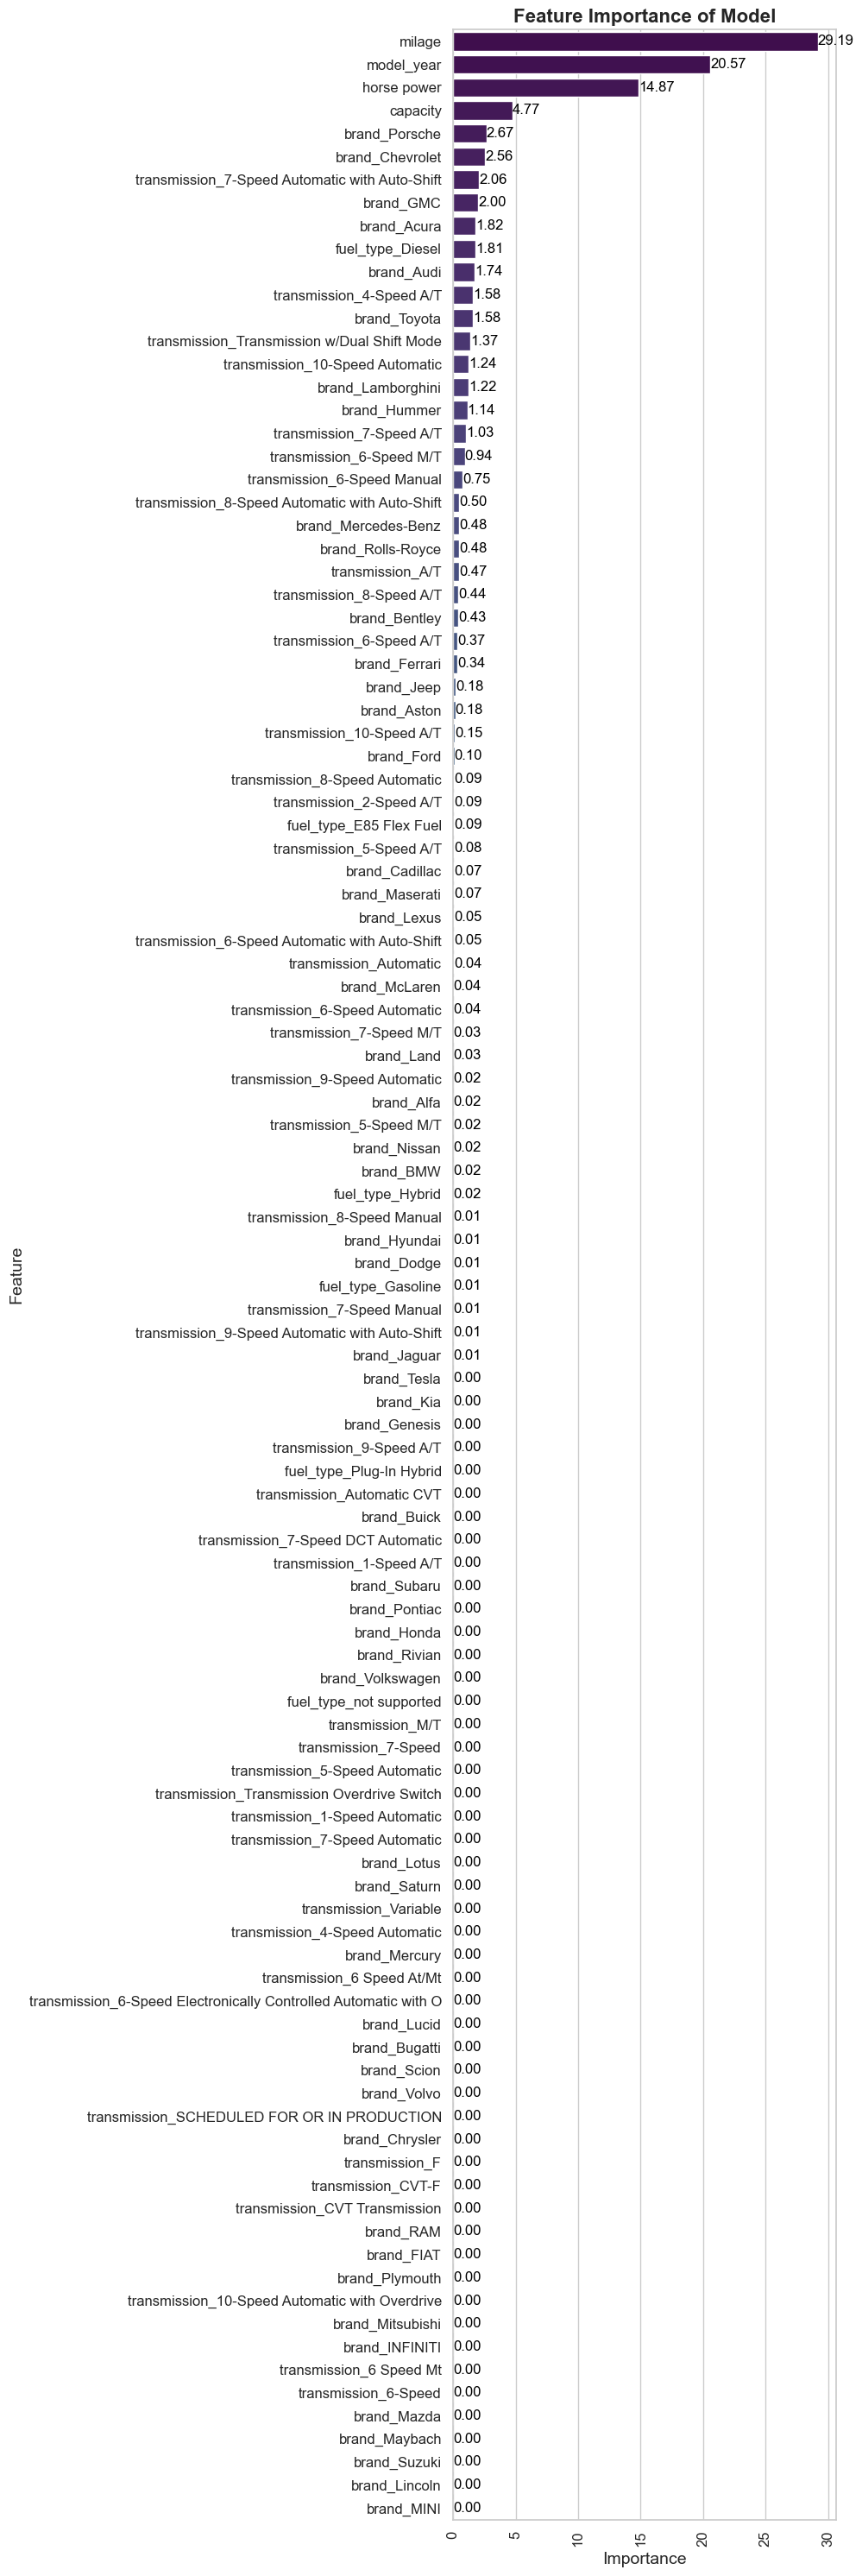

In [70]:
plot_model_importance(CatBoostRegressor,**best_cbr_params)

## 7.1 Hyper Parameter Tuning with `Optuna` 

In [73]:
import optuna

def objective(trial:optuna.Trial):
    """
    Objective function for Optuna to minimize RMSE loss.

    Args:
        trial (optuna.Trial): The current trial object from Optuna.

    Returns:
        float: The RMSE loss on the validation set.
    """

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 800, 1000,),  
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.006), 
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 2),  
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.6, 0.8),  
        "subsample": trial.suggest_float("subsample", 0.8, 1), 
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 150, 200),  
        "max_bin": trial.suggest_int("max_bin", 120, 180), 
        "od_wait": trial.suggest_int("od_wait", 50, 80, step=10), 
        "od_type": 'Iter',  
        "bootstrap_type": 'Bernoulli',  
        "random_seed": 42, 
        'verbose': 0 ,
    }

    model = CatBoostRegressor(**params)  
    model.fit(X_train, train_targets, eval_set=[(X_val, val_targets)])

    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(val_targets, preds))

    return rmse

In [74]:
import optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

[I 2024-06-25 13:29:04,153] A new study created in memory with name: no-name-7aba4ccf-da51-49c6-8fc4-432b280458e5
[I 2024-06-25 13:29:07,557] Trial 0 finished with value: 75753.99947374323 and parameters: {'n_estimators': 828, 'learning_rate': 0.005657883803100873, 'l2_leaf_reg': 1.9873617133320407, 'colsample_bylevel': 0.6207770201073252, 'subsample': 0.8216695208180044, 'min_data_in_leaf': 172, 'max_bin': 138, 'od_wait': 70}. Best is trial 0 with value: 75753.99947374323.
[I 2024-06-25 13:29:11,226] Trial 1 finished with value: 75672.94965498851 and parameters: {'n_estimators': 941, 'learning_rate': 0.005617071506425248, 'l2_leaf_reg': 1.5594447904985635, 'colsample_bylevel': 0.6300221517171207, 'subsample': 0.8438625808340848, 'min_data_in_leaf': 199, 'max_bin': 125, 'od_wait': 80}. Best is trial 1 with value: 75672.94965498851.
[I 2024-06-25 13:29:15,063] Trial 2 finished with value: 75602.50264569107 and parameters: {'n_estimators': 979, 'learning_rate': 0.0053655332778159886, 'l2

### 7.1 Extracting  the best parameters for `CatBoostRegressor`

In [75]:
best_cbr_params = study.best_trial.params
best_cbr_params

{'n_estimators': 984,
 'learning_rate': 0.005849301729183593,
 'l2_leaf_reg': 1.147539247212831,
 'colsample_bylevel': 0.6750092255239388,
 'subsample': 0.8308534713991168,
 'min_data_in_leaf': 158,
 'max_bin': 174,
 'od_wait': 70}

### 7.2 Visualizing Hyper Parameter tuning History

In [77]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(width=1000,height=700)
fig.show()

<img src = "../model scores/CatBoostRegressor/optimization_history_plot.png">

In [78]:
fig = optuna.visualization.plot_param_importances(study)
fig.update_layout(width=900,height=600)
fig.show()

<img src = "../model scores/CatBoostRegressor/hyperparameter_importance.png">

In [82]:
trial = study.best_trial
fig = optuna.visualization.plot_slice(study, params= trial.params.keys())
fig.show()

<img src = "../model scores/CatBoostRegressor/slice_plot.png">

In [76]:
best_cbr_params= {
        'n_estimators': 984,
        'learning_rate': 0.005849301729183593,
        'l2_leaf_reg': 1.147539247212831,
        'colsample_bylevel': 0.6750092255239388,
        'subsample': 0.8308534713991168,
        'min_data_in_leaf': 158,
        'max_bin': 174,
        'od_wait': 70,
        "od_type": 'Iter',  
        "bootstrap_type": 'Bernoulli',  
        "random_seed": 42, 
        'verbose': 0 ,
}
evalmodel(CatBoostRegressor , **best_cbr_params)

{'Train RMSE:': '62701.405566409514',
 'Val RMSE:': '75473.14984170532',
 'Train R2 Score:': '-7.404827218185414',
 'Val R2 Score:': '-7.404827218185414'}

C:\Users\Saket\AppData\Local\Temp\ipykernel_21584\3607180860.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




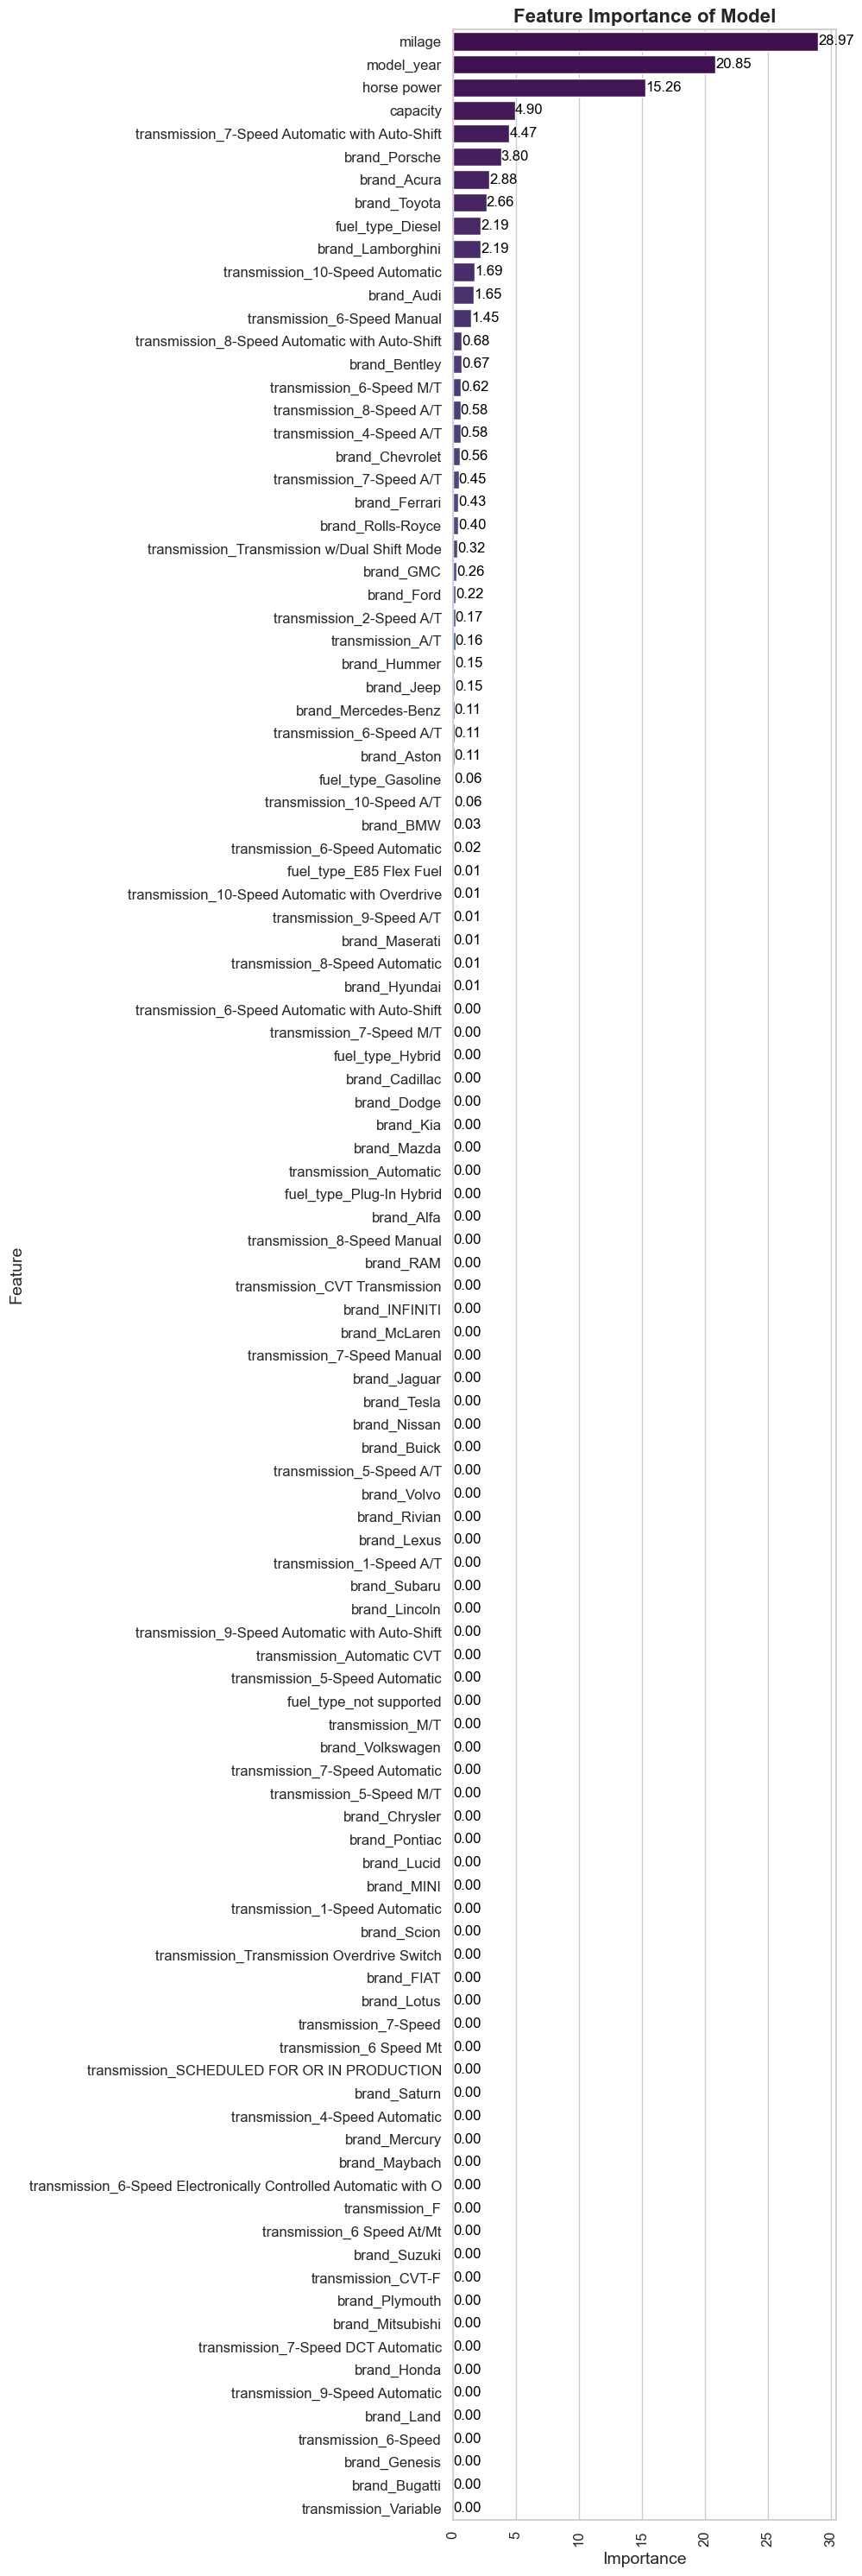

In [92]:
plot_model_importance(CatBoostRegressor,**best_cbr_params)

## 8. Submiting the final prediction for the test dataset

In [93]:
from pathlib import Path
def submit_prediction(model:type[RegressorMixin],
                      model_name : str,
                      submission_df : pd.DataFrame= submission_df, 
                      X_train: np.array=X_train, 
                      train_targets : np.array=train_targets,
                      X_test:np.array=X_test, 
                      **params) -> dict[str , float]:
    """
    Trains a regression model, makes predictions on the test dataset, and saves the predictions to a CSV file.

    Parameters:
    model (type[RegressorMixin]): The regression model class.
    model_name (str): The name of the model, used for naming the submission file.
    submission_df (pd.DataFrame): The DataFrame used for submission, to which the predictions will be added.
    X_train (np.ndarray): The training feature data.
    train_targets (np.ndarray): The training target data.
    X_test (np.ndarray): The test feature data.
    **params: Additional parameters to initialize the regression model.

    Returns:
    dict: A dictionary containing the parameters used to initialize the model and the trained model instance.

    Example:
    >>> from sklearn.linear_model import Ridge
    >>> import pandas as pd
    >>> import numpy as np
    >>> from pathlib import Path
    >>> X_train = np.array([[1, 2], [3, 4], [5, 6]])
    >>> train_targets = np.array([1, 2, 3])
    >>> X_test = np.array([[7, 8], [9, 10]])
    >>> submission_df = pd.DataFrame({'id': [1, 2]})
    >>> params = {'alpha': 1.0}
    >>> submit_prediction(Ridge, 'ridge_model', submission_df, X_train, train_targets, X_test, **params)
    submission_df saved at : submission\\submisson_df_ridge_model.csv
    {
        'alpha': 1.0,
        'model': Ridge(alpha=1.0)
    }
    """
    model = model(**params).fit(X_train,train_targets)
    test_preds = model.predict(X_test)
    submission_df['price'] = test_preds
    submission_path = Path('submission')
    submission_df.to_csv(f'..\\{submission_path}\\submisson_df_{model_name}.csv' , index=False)
    params['model'] = model
    print(f"submission_df saved at : {submission_path}\\submisson_df_{model_name}.csv")
    return params

In [94]:
submit_prediction(CatBoostRegressor,"CatBoostRegressor",**best_cbr_params)

submission_df saved at : submission\submisson_df_CatBoostRegressor.csv


{'n_estimators': 984,
 'learning_rate': 0.005849301729183593,
 'l2_leaf_reg': 1.147539247212831,
 'colsample_bylevel': 0.6750092255239388,
 'subsample': 0.8308534713991168,
 'min_data_in_leaf': 158,
 'max_bin': 174,
 'od_wait': 70,
 'od_type': 'Iter',
 'bootstrap_type': 'Bernoulli',
 'random_seed': 42,
 'verbose': 0,
 'model': <catboost.core.CatBoostRegressor at 0x24f56a5d450>}

In [91]:
model = CatBoostRegressor(**best_cbr_params)
model.fit(X_train,train_targets)

## 9. Saving and loading model

In [89]:
import os
from sklearn.base import RegressorMixin
import joblib
def save_model(model : type[RegressorMixin], 
               model_params : dict[str,float], 
               filepath:str) -> None:
    """
    Save a model and its parameters to a specified file path using joblib.

    Parameters:
    model (type[ClassifierMixin]) : The model to be saved.
    model_params (dict[str,float]) : The parameters used to create the model.
    filepath (str): The file path where the model and its parameters will be saved.
    
    Returns:
    None
    """
    os.makedirs(os.path.dirname(filepath), exist_ok=True)

    model_data = {
        'model': model,
        'params': model_params
    }

    joblib.dump(model_data, filepath)
    print(f"Model and parameters saved to {filepath}")

def load_model(filepath:str) -> tuple[type[RegressorMixin],dict[str,float]]:
    """
    Load a model and its parameters from a specified file path using joblib.

    Parameters:
    filepath (str): The file path from where the model and its parameters will be loaded.
    
    Returns:
    model (type[ClassifierMixin]) : The loaded model.
    model_params (dict[str,float]): The parameters used to create the model.
    """
    model_data = joblib.load(filepath)
    
    model = model_data['model']
    model_params = model_data['params']
    
    print(f"Model and parameters loaded from {filepath}")
    return model, model_params

In [95]:
filepath = '../saved models/CBRModel.joblib'
save_model(model =model , model_params=best_cbr_params,filepath=filepath )

Model and parameters saved to saved models/CBRModel.joblib


In [96]:
loaded_model , loaded_model_params = load_model(filepath=filepath)

Model and parameters loaded from saved models/CBRModel.joblib


In [100]:
train_preds = loaded_model.predict(X_train)
val_preds = loaded_model.predict(X_val)

In [102]:
print(f"Train RMSE: {mean_squared_error(train_targets,train_preds,squared=False)}")
print(f"Val RMSE: {mean_squared_error(val_targets,val_preds,squared=False)}")

Train RMSE: 62701.405566409514
Val RMSE: 75473.14984170532


<img src = "../model scores/CatBoostRegressor/CatBoostRegressor_Score.png">